In [1]:
import geopandas as gpd
import geodatasets

c:\Users\priti\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
chicago = gpd.read_file(geodatasets.get_path("geoda.chicago_commpop"))
groceries = gpd.read_file(geodatasets.get_path("geoda.groceries"))

In [3]:
chicago.head()

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


<Axes: >

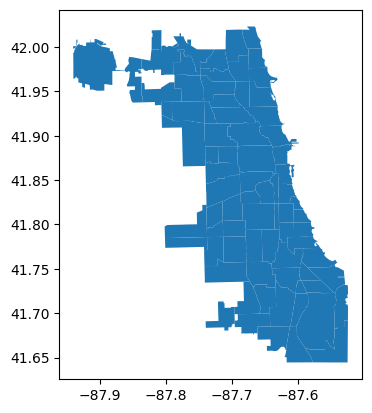

In [4]:
chicago.plot()

# Cloropleth map

<Axes: >

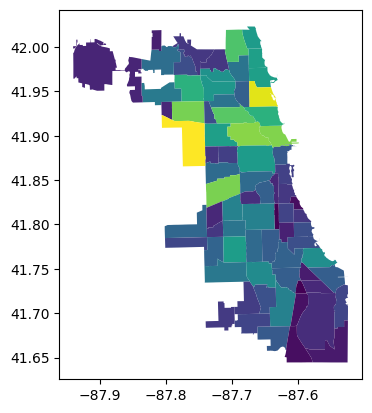

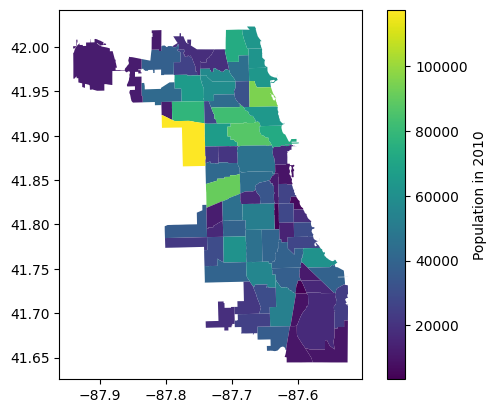

In [5]:
chicago.plot("POP2010")
chicago.plot("POP2000",legend=True,legend_kwds={"label": "Population in 2010", "orientation": "vertical"},)

<Axes: >

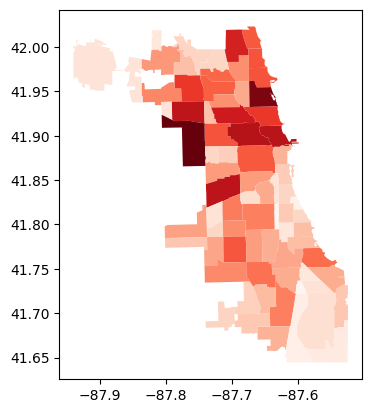

In [6]:
chicago.plot(column="POP2010",cmap='Reds')

<Axes: >

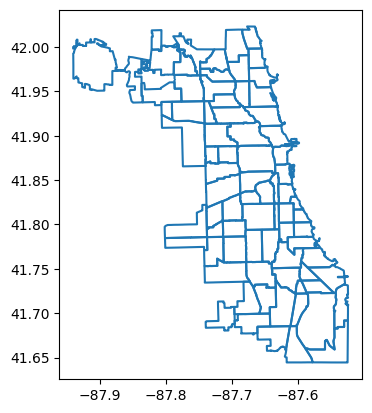

In [7]:
chicago.boundary.plot()

In [8]:
import mapclassify

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

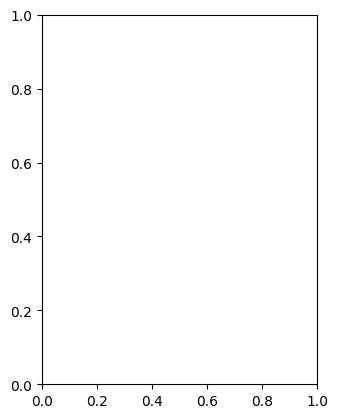

In [ ]:

# Assuming 'chicago' is a GeoDataFrame
chicago.plot(column='POP2010', cmap='OrRd', scheme='Quantiles');

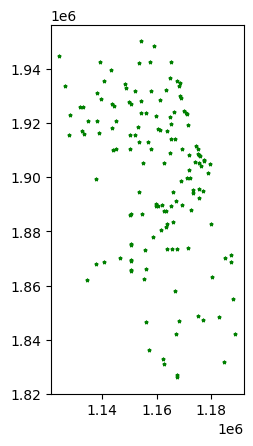

In [ ]:
groceries.plot(marker='*', color='green', markersize=5);

# Check crs
groceries = groceries.to_crs(chicago.crs)

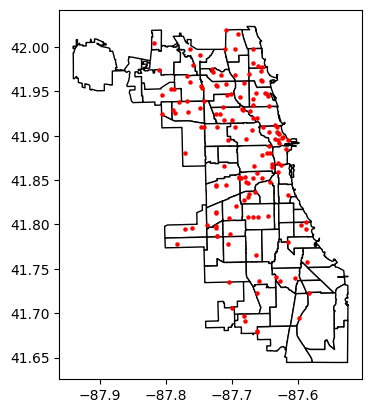

In [ ]:
base = chicago.plot(color='white', edgecolor='black')

groceries.plot(ax=base, marker='o', color='red', markersize=5);


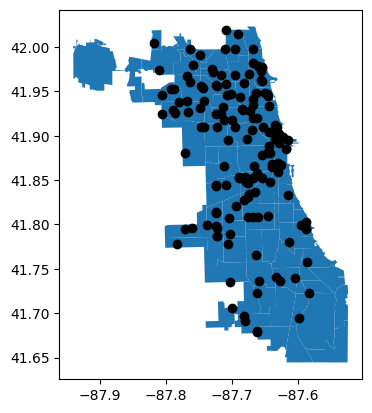

In [ ]:
ax = groceries.plot(color='k', zorder=2)

chicago.plot(ax=ax, zorder=1);

<Axes: xlabel='POP2010', ylabel='POP2000'>

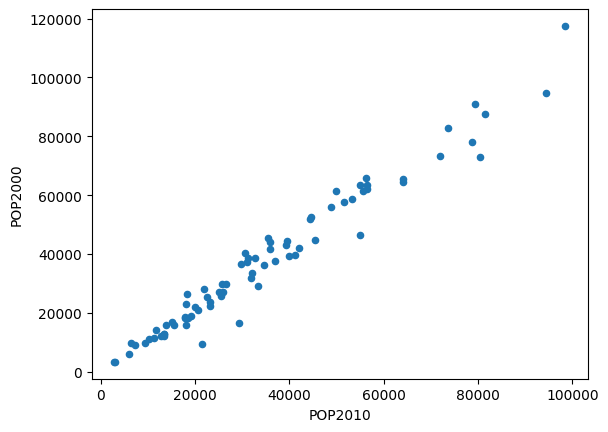

In [ ]:
chicago.plot(kind="scatter", x="POP2010", y="POP2000")

<Axes: ylabel='Frequency'>

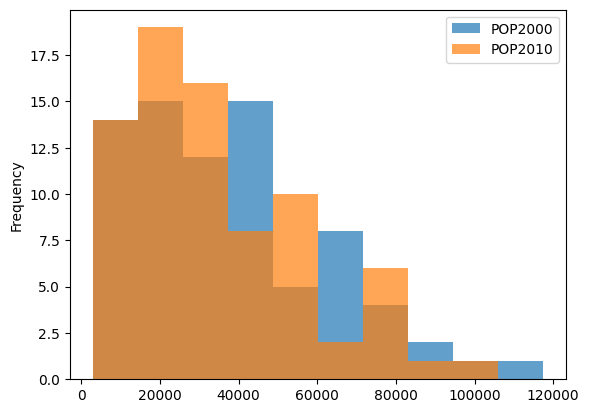

In [ ]:
chicago[["POP2000", "POP2010", "geometry"]].plot.hist(alpha=.7)


## GeoPandas Mapping and Plotting Examples
Here we extend the notebook with different map visualizations using **GeoPandas**.

In [9]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Load world dataset
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# 1. Basic world map
world.plot(figsize=(12, 6))
plt.title("Basic World Map", fontsize=15)
plt.show()


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [10]:

# 2. Choropleth: World map by population
world.plot(column="pop_est", cmap="viridis", legend=True, figsize=(12, 6))
plt.title("World Population (Estimate)", fontsize=15)
plt.show()


NameError: name 'world' is not defined

In [11]:

# 3. Multiple layers: Adding cities on top of countries
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
base = world.plot(color="lightgrey", edgecolor="black", figsize=(12, 6))
cities.plot(ax=base, color="red", markersize=20)
plt.title("World Map with Major Cities", fontsize=15)
plt.show()


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [12]:

# 4. Reprojecting the world map to Mercator projection
world_merc = world.to_crs(epsg=3857)
world_merc.plot(figsize=(12, 6))
plt.title("World Map in Mercator Projection", fontsize=15)
plt.show()


NameError: name 'world' is not defined

In [13]:

# 5. Spatial join: Which country each city belongs to
city_country = gpd.sjoin(cities, world, how="left", predicate="within")
city_country[["name_left", "name_right"]].head()


NameError: name 'cities' is not defined